In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from sklearn import preprocessing #Used for Normalized calculations
import seaborn as sns

In [2]:
# Create path references for our input Data Set for National Shootings Data 1/2/15 through 2/28/17
shootings_data_path = "../raw_data/DataSet1.csv"

In [3]:
# Import the CSV file to its respective dataframe
shootings_df = pd.read_csv(shootings_data_path, low_memory = False)
# Print the first five rows of data to the screen - just to be sure we have imported the CSV correctly
shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,1/2/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,1/2/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,1/3/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,1/4/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,1/4/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
# Getting counts of all data elements of our shootings_df
shootings_df.count()

id                         2142
name                       2123
date                       2142
manner_of_death            2142
armed                      2136
age                        2099
gender                     2141
race                       2039
city                       2142
state                      2142
signs_of_mental_illness    2142
threat_level               2142
flee                       2106
body_camera                2142
dtype: int64

In [5]:
# Data Clean-up Logic
# As we see inconsistent counts, we will clean up our dataframe as below
shootings_df = shootings_df.dropna(how = 'any')
# Now showing the revised count
shootings_df.count()

id                         1986
name                       1986
date                       1986
manner_of_death            1986
armed                      1986
age                        1986
gender                     1986
race                       1986
city                       1986
state                      1986
signs_of_mental_illness    1986
threat_level               1986
flee                       1986
body_camera                1986
dtype: int64

In [6]:
# Writing our clean dataframe back into a CSV file
shootings_df.to_csv("../raw_data/Updated_Shootings_Data.csv", index = False)

In [7]:
# Calculating number of shootings by State
state_shootings_df = shootings_df.groupby('state')

In [8]:
# Counting the shootings per state
state_shooting_count = state_shootings_df["id"].count()
# Creating a dataframe for count of shootings per state
state_shooting_count_df = pd.DataFrame({"Shooting Count": state_shooting_count})
# Sorting the dataframe by largest count first
state_shooting_count_df_sort = state_shooting_count_df.sort_values("Shooting Count", ascending = False)
# Displaying the dataframe
state_shooting_count_df_sort

,Shooting Count
state,
CA,320
TX,183
FL,121
AZ,89
NC,63
OH,59
CO,59
GA,56
OK,54


In [9]:
# Now reset the index to make state as a regular column, this will help us out with our plots
state_shooting_count_df_sort_indexed = state_shooting_count_df_sort.reset_index()
# Now picking number of states as defined by the state_count. It will be too much clutter in our charts to show all 50 states
state_count = 25
top_state_shooting = state_shooting_count_df_sort_indexed.head(state_count) # Now, in this code I can always change state_count to any other value to display additional or less states
top_state_shooting # Display the new data frame

,state,Shooting Count
0,CA,320
1,TX,183
2,FL,121
3,AZ,89
4,NC,63
5,OH,59
6,CO,59
7,GA,56
8,OK,54
9,MO,50


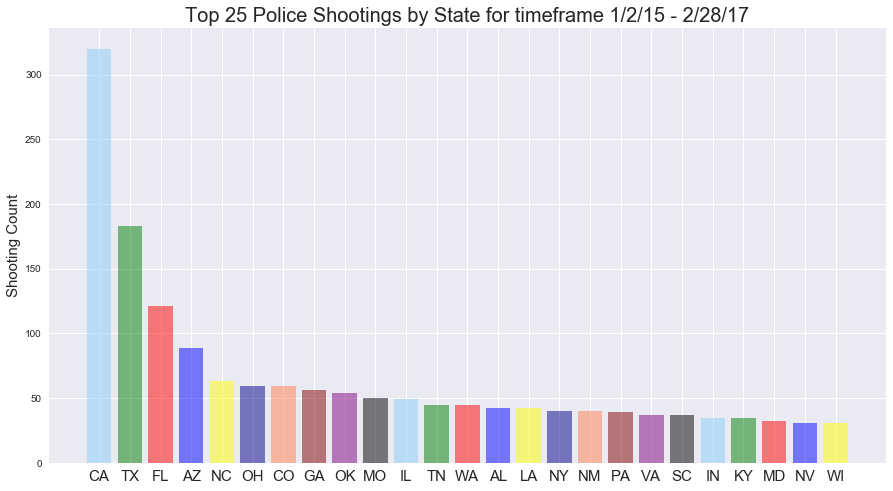

In [27]:
# Now creating the code for the bar chart
sns.set() # Using seaborn
# Defining x and y axis. x Axis is the state and y axis is the Shooting count
x_axis = np.arange(len(top_state_shooting["state"]))
y_axis = top_state_shooting["Shooting Count"]
# Tell matplotlib that we will be making a bar chart
# We apply align="edge" to ensure our bars line up with our tick marks, and we assign respective colors
plt.bar(x_axis, y_axis, color=['lightskyblue', 'green', 'red', 'blue', 'yellow', 'darkblue', 'coral', 'maroon','purple', 'black'], alpha=0.5, align="edge")
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, top_state_shooting["state"], fontsize = 15)
#Give our chart Y Label and Title
plt.title("Top " + str(state_count)+ " Police Shootings by State for timeframe 1/2/15 - 2/28/17", fontsize = 20)
plt.ylabel("Shooting Count", fontsize = 15)
# Code for increasing fig size for prettier looks :)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
# Saving the Image
plt.savefig("../Images/Top_State_Shootings.png") # saving the graph as a .png image
# Showing the plot
plt.show()

In [11]:
# Calculating Victims Weapon of Choice
weapon_shootings_df = shootings_df.groupby('armed')
# Counting the shootings per weapon that the victim held
weapon_shootings_count = weapon_shootings_df["id"].count()
# Creating a dataframe for count of shootings per state
weapon_shootings_count_df = pd.DataFrame({"Shooting Count": weapon_shootings_count})
# Sorting the dataframe by largest count first
weapon_shooting_count_df_sort = weapon_shootings_count_df.sort_values("Shooting Count", ascending = False)
# Displaying the dataframe
weapon_shooting_count_df_sort.head(30)

,Shooting Count
armed,
gun,1094
knife,290
unarmed,151
vehicle,128
undetermined,90
toy weapon,90
machete,15
unknown weapon,11
sword,8


In [12]:
# Now reset the index to make state as a regular column, this will help us out with our plots
weapon_shooting_count_df_sort_indexed = weapon_shooting_count_df_sort.reset_index()
# Now picking the weapons as defined by the Weapons Count
weapon_count = 10
top_weapon_shooting = weapon_shooting_count_df_sort_indexed.head(weapon_count) # Now, in this code I can always change weapon_count to any other value to display additional or less weapons
top_weapon_shooting # displaying the new dataframe

,armed,Shooting Count
0,gun,1094
1,knife,290
2,unarmed,151
3,vehicle,128
4,undetermined,90
5,toy weapon,90
6,machete,15
7,unknown weapon,11
8,sword,8
9,metal pipe,7


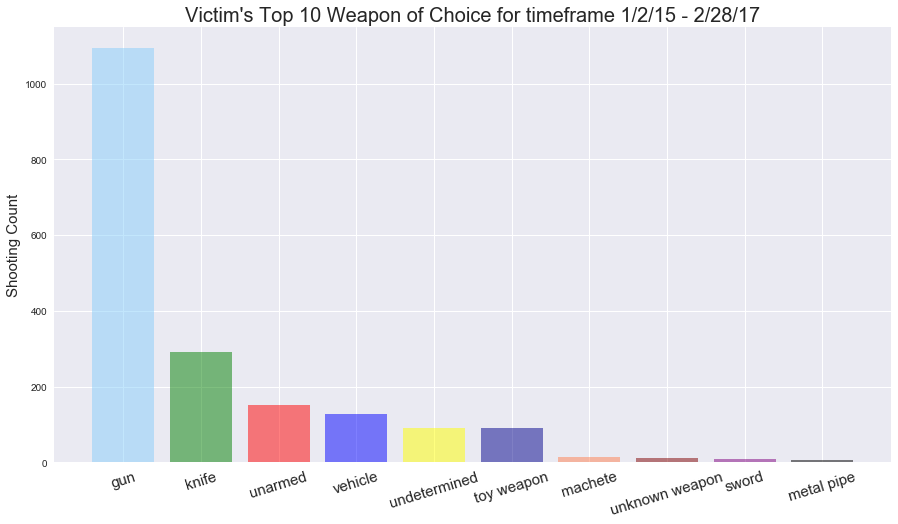

In [13]:
# Now creating the code for the bar chart
# Defining x and y axis. x Axis is the Weapon of Choice (armed) and y axis is the Shooting count
x_axis = np.arange(len(top_weapon_shooting["armed"]))
y_axis = top_weapon_shooting["Shooting Count"]
# Tell matplotlib that we will be making a bar chart
# We apply align="edge" to ensure our bars line up with our tick marks, and we assign respective colors
plt.bar(x_axis, y_axis, color=['lightskyblue', 'green', 'red', 'blue', 'yellow', 'darkblue', 'coral', 'maroon','purple', 'black'], alpha=0.5, align="edge")
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, top_weapon_shooting["armed"], fontsize = 15, rotation=17)
#Give our chart Y Label and Title
plt.title("Victim's Top " + str(weapon_count) + " Weapon of Choice for timeframe 1/2/15 - 2/28/17", fontsize = 20)
plt.ylabel("Shooting Count", fontsize = 15)
# Code for increasing fig size for prettier looks :)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
# Saving the Image
plt.savefig("../Images/Top_Weapon_Shootings.png") # saving the graph as a .png image
# Showing the plot
plt.show()

In [14]:
# Calculations for Victims by Gender
gender_shootings_df = shootings_df.groupby("gender")
gender_shootings_df.count() # Display

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,84,84,84,84,84,84,84,84,84,84,84,84,84
M,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902,1902


In [15]:
# Counting the shootings by gender
gender_shooting_count = gender_shootings_df["id"].count()
# Creating a dataframe for count of shootings by gender
gender_shooting_count_df = pd.DataFrame({"Shooting Count": gender_shooting_count})
# Sorting the dataframe by largest count first
gender_shooting_count_df_sort = gender_shooting_count_df.sort_values("Shooting Count", ascending = False)
# Displaying the dataframe
gender_shooting_count_df_sort

,Shooting Count
gender,
M,1902
F,84


In [16]:
# Now resetting the index of the gender column, this will help us out with our pie charts later
gender_shooting_count_index = gender_shooting_count_df_sort.reset_index()
gender_shooting_count_index # Display

,gender,Shooting Count
0,M,1902
1,F,84


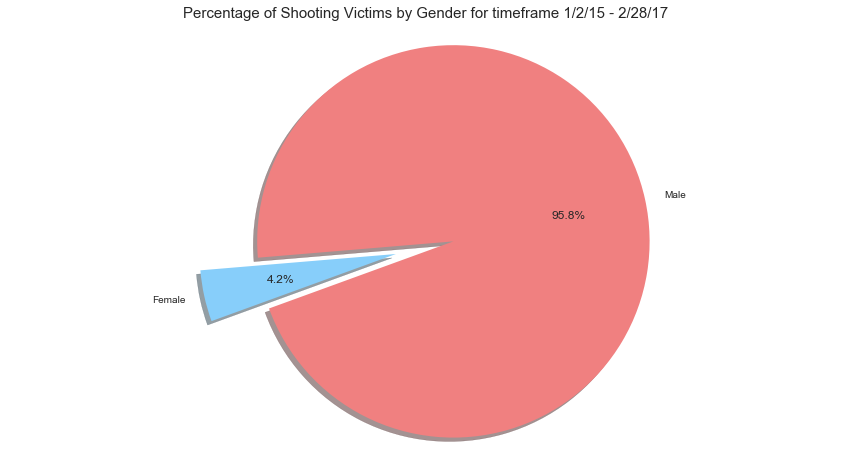

In [17]:
# Code for pie chart for Percentage of Victims by Gender
# Labels for the sections of our pie chart
labels = ["Male", "Female"]
# The values of each section of the pie chart
sizes = gender_shooting_count_index["Shooting Count"]
# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]
# Tells matplotlib to seperate the Suburban and Rural sections from the others
explode = (0, 0.3)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Create Title
plt.title("Percentage of Shooting Victims by Gender for timeframe 1/2/15 - 2/28/17", fontsize = 15)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Saving the Image
plt.savefig("../Images/Gender Percentage.png") # saving the graph as a .png image

# Prints our pie chart to the screen
plt.show()

In [18]:
# Calculations for Victims by Race
race_shootings_df = shootings_df.groupby("race")
race_shootings_df.count() # Display

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
A,32,32,32,32,32,32,32,32,32,32,32,32,32
B,523,523,523,523,523,523,523,523,523,523,523,523,523
H,355,355,355,355,355,355,355,355,355,355,355,355,355
N,26,26,26,26,26,26,26,26,26,26,26,26,26
O,28,28,28,28,28,28,28,28,28,28,28,28,28
W,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022


In [19]:
# Counting the shootings by race
race_shooting_count = race_shootings_df["id"].count()
# Creating a dataframe for count of shootings by race
race_shooting_count_df = pd.DataFrame({"Shooting Count": race_shooting_count})
# Sorting the dataframe by largest count first
race_shooting_count_df_sort = race_shooting_count_df.sort_values("Shooting Count", ascending = False)
# Displaying the dataframe
race_shooting_count_df_sort

,Shooting Count
race,
W,1022
B,523
H,355
A,32
O,28
N,26


In [20]:
# Now resetting the index of the race column, this will help us out with our pie charts later
race_shooting_count_index = race_shooting_count_df_sort.reset_index()
race_shooting_count_index # Displaying the dataframe

,race,Shooting Count
0,W,1022
1,B,523
2,H,355
3,A,32
4,O,28
5,N,26


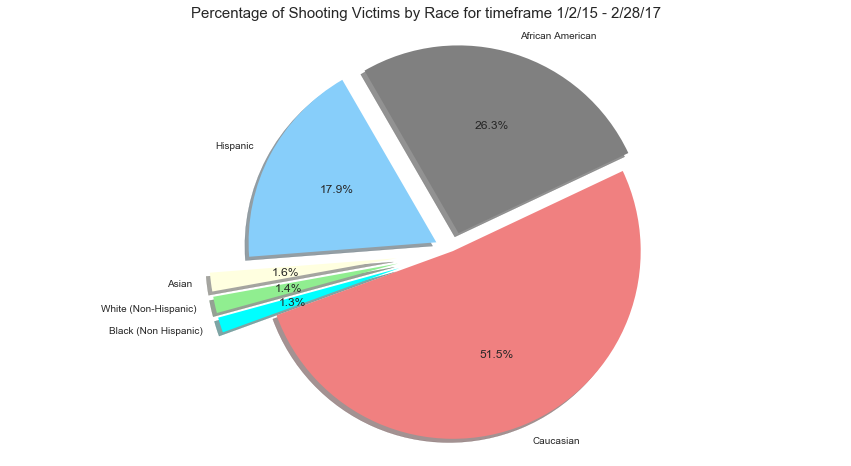

In [21]:
# Code for pie chart for Percentage of Victims by Race
# Labels for the sections of our pie chart
labels = ["Caucasian", "African American", "Hispanic", "Asian", "White (Non-Hispanic)", "Black (Non Hispanic)"]
# The values of each section of the pie chart
sizes = race_shooting_count_index["Shooting Count"]
# The colors of each section of the pie chart
colors = ["lightcoral", "grey", "lightskyblue", "lightyellow", "lightgreen", "cyan"]
# Tells matplotlib to seperate the Suburban and Rural sections from the others
explode = (0, 0.1,0.1,0.3,0.3,0.3)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Create Title
plt.title("Percentage of Shooting Victims by Race for timeframe 1/2/15 - 2/28/17", fontsize = 15)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Saving the Image
plt.savefig("../Images/Race Percentage.png") # saving the graph as a .png image
# Prints our pie chart to the screen
plt.show()

In [22]:
# Code for binning logic

# Create the logic for binning
max_age = shootings_df["age"].max() # Calculating the maximum age
min_age = shootings_df["age"].min() # Calculating the minimum age

# Bins defined by Victim's Age Group as: <13 = Child, 13 – 17 = “Teen”, 18 – 22 = “College”, 
# 23 – 30 = “Young Adult”, 31 – 64 = “Adult”, 65 – 87 = “Senior”; pie chart)

bins = [0, 12, 17, 22, 30, 64, max_age]
group_names = ['<13 = Child','13-17 = Teen','18-22 = College','23-30 = Young Adult','31-64 = Adult','65+ = Senior']

# Using the Bin function to split our data by "Age Demogrpahics" into 6 bins
shootings_df["Age Demographics"] = pd.cut(shootings_df["age"], bins, labels=group_names)
shootings_df.head() # Display the dataframe

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age Demographics
0,3,Tim Elliot,1/2/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,31-64 = Adult
1,4,Lewis Lee Lembke,1/2/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,31-64 = Adult
2,5,John Paul Quintero,1/3/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,23-30 = Young Adult
3,8,Matthew Hoffman,1/4/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,31-64 = Adult
4,9,Michael Rodriguez,1/4/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,31-64 = Adult


In [23]:
# Calculations for Victims by Race
age_shootings_df = shootings_df.groupby("Age Demographics")
age_shootings_df.count() # Display

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
Age Demographics,,,,,,,,,,,,,,
<13 = Child,2,2,2,2,2,2,2,2,2,2,2,2,2,2
13-17 = Teen,36,36,36,36,36,36,36,36,36,36,36,36,36,36
18-22 = College,212,212,212,212,212,212,212,212,212,212,212,212,212,212
23-30 = Young Adult,519,519,519,519,519,519,519,519,519,519,519,519,519,519
31-64 = Adult,1173,1173,1173,1173,1173,1173,1173,1173,1173,1173,1173,1173,1173,1173
65+ = Senior,44,44,44,44,44,44,44,44,44,44,44,44,44,44


In [24]:
# Counting the shootings by age
age_shooting_count = age_shootings_df["id"].count()
# Creating a dataframe for count of shootings by age
age_shooting_count_df = pd.DataFrame({"Shooting Count": age_shooting_count})
# Sorting the dataframe by largest count first
age_shooting_count_df_sort = age_shooting_count_df.sort_values("Shooting Count", ascending = False)
# Displaying the dataframe
age_shooting_count_df_sort

,Shooting Count
Age Demographics,
31-64 = Adult,1173
23-30 = Young Adult,519
18-22 = College,212
65+ = Senior,44
13-17 = Teen,36
<13 = Child,2


In [25]:
# Now resetting the index of the age column, this will help us out with our pie charts later
age_shooting_count_index = age_shooting_count_df_sort.reset_index()
age_shooting_count_index # Displaying the dataframe

,Age Demographics,Shooting Count
0,31-64 = Adult,1173
1,23-30 = Young Adult,519
2,18-22 = College,212
3,65+ = Senior,44
4,13-17 = Teen,36
5,<13 = Child,2


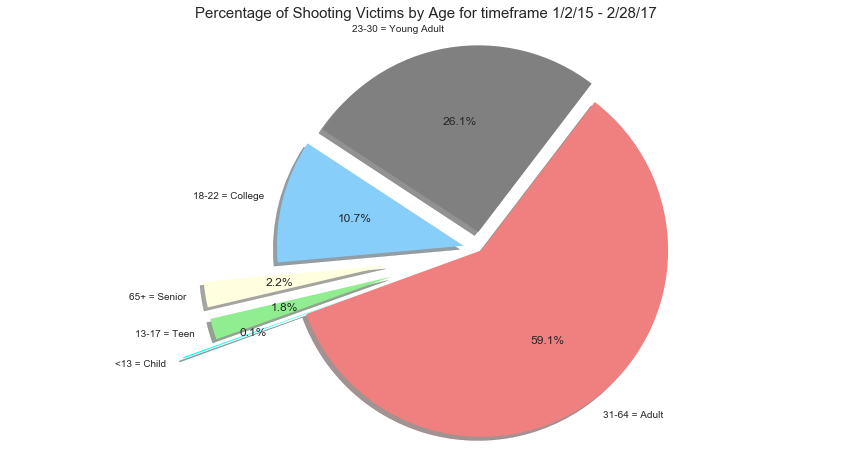

In [26]:
# Code for pie chart for Percentage of Victims by Age
# Labels for the sections of our pie chart
labels = age_shooting_count_index["Age Demographics"]
# The values of each section of the pie chart
sizes = age_shooting_count_index["Shooting Count"]

# The colors of each section of the pie chart
colors = ["lightcoral", "grey", "lightskyblue", "lightyellow", "lightgreen", "cyan"]
# Tells matplotlib to seperate the Suburban and Rural sections from the others
explode = (0, 0.1,0.1,0.5,0.5,0.7)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Create Title
plt.title("Percentage of Shooting Victims by Age for timeframe 1/2/15 - 2/28/17", fontsize = 15)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Saving the Image
plt.savefig("../Images/Age Percentage.png") # saving the graph as a .png image
# Prints our pie chart to the screen
plt.show()